In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#
file_path = "drive/MyDrive/MLLAB/iris_pca.csv"
df = pd.read_csv(file_path)
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
x= df.drop('species',axis=1).values
y = df['species'].values

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
x_std= (x-np.mean(x,axis=0))/np.std(x,axis=0)
#x_std

In [ ]:
cov_matrix= np.cov(x_std,rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvectors

array([[ 0.26128628,  0.71956635,  0.37741762, -0.52106591],
       [-0.12350962, -0.24438178,  0.92329566,  0.26934744],
       [-0.80144925, -0.14212637,  0.02449161, -0.5804131 ],
       [ 0.52359713, -0.63427274,  0.06694199, -0.56485654]])

In [ ]:
# Choose the top k eigenvectors (principal components)
k= 2
top_eigenvectors= eigenvectors[:,k:]
top_eigenvectors

array([[ 0.37741762, -0.52106591],
       [ 0.92329566,  0.26934744],
       [ 0.02449161, -0.5804131 ],
       [ 0.06694199, -0.56485654]])

In [ ]:
x_pca= np.dot(x_std,top_eigenvectors)
#x_pca

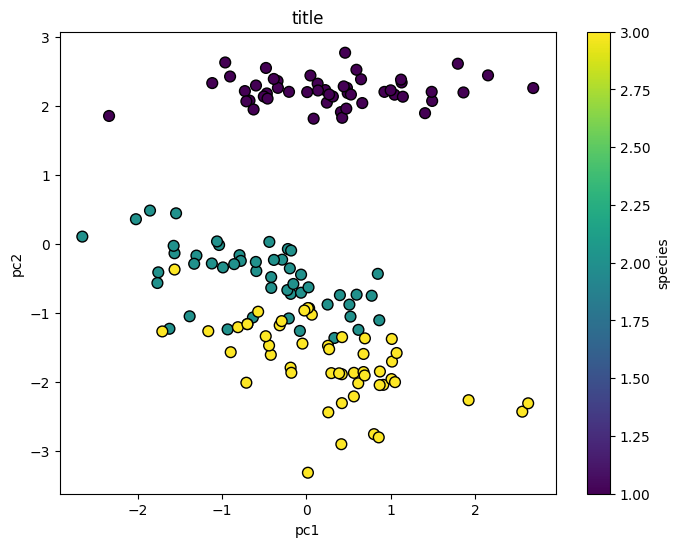

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='viridis',edgecolor='k',s=60)
plt.title("title")
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.colorbar(label='species')
plt.show()